In [1]:
import src.data_acquisition as da

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [4]:
df=da.getStablePoolHistory(10000000)

In [5]:
df

,date,tvlUSD,volumeUSD,feesUSD,pool_id,pool_name
0,2021-05-24,4.038929e+05,1.560326e+05,78.016302,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
1,2021-05-25,6.273335e+05,1.641681e+06,820.840475,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
2,2021-05-26,6.411043e+05,1.581438e+05,79.071880,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
3,2021-05-27,6.411378e+05,6.312746e+04,31.563732,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
4,2021-05-28,5.229501e+05,3.004094e+05,150.204708,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
...,...,...,...,...,...,...
2304,2022-10-27,2.852509e+07,1.856427e+06,928.213331,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05
2305,2022-10-28,2.850823e+07,5.045840e+06,2522.919836,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05
2306,2022-10-29,2.851159e+07,6.669950e+06,3334.975121,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05
2307,2022-10-30,3.213952e+07,1.031828e+06,515.913950,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05


In [6]:
df['returns']=df.feesUSD/df.tvlUSD

In [7]:
start_date=df[df.pool_name=='USDC_USDT_01'].date.min()

In [8]:
current_env=df[df.date>start_date].reset_index(drop=True)

In [9]:
current_env.groupby('pool_name').returns.mean()*365

pool_name
BUSD_USDC_05    0.013068
DAI_USDC_01     0.017927
DAI_USDC_05     0.004436
USDC_USDT_01    0.021991
USDC_USDT_05    0.042014
Name: returns, dtype: float64

In [10]:
current_env.groupby('pool_name').agg({'returns':['mean','std']})

returns          
                  mean       std
pool_name                       
BUSD_USDC_05  0.000036  0.000143
DAI_USDC_01   0.000049  0.000158
DAI_USDC_05   0.000012  0.000026
USDC_USDT_01  0.000060  0.000050
USDC_USDT_05  0.000115  0.000281

In [11]:
def returnsColumn(gb_tupple):
    pool_name,frame=gb_tupple
    series=frame.sort_values('date',ascending=True).returns.reset_index(drop=True)
    series.name=pool_name
    return series

In [12]:
pd.concat([returnsColumn(tupple) for tupple in current_env.groupby('pool_name')],axis=1)

,BUSD_USDC_05,DAI_USDC_01,DAI_USDC_05,USDC_USDT_01,USDC_USDT_05
0,0.000092,0.000146,8.987138e-05,0.000080,0.000043
1,0.000285,0.000232,4.994879e-05,0.000436,0.000121
2,0.000179,0.002043,1.749659e-04,0.000518,0.000179
3,0.000090,0.000577,6.647771e-05,0.000103,0.000048
4,0.000270,0.000863,3.538135e-05,0.000094,0.000094
...,...,...,...,...,...
347,NaN,0.000006,1.406885e-06,0.000041,0.000033
348,NaN,0.000006,1.446730e-06,0.000064,0.000088
349,NaN,0.000006,1.491169e-06,0.000051,0.000117
350,NaN,0.000004,6.553577e-07,0.000054,0.000016


In [13]:
busd=current_env[current_env.pool_name=='BUSD_USDC_05'].copy()

In [37]:
busd_range=pd.date_range(busd.date.min(),current_env.date.max())
len(busd_range[~busd_range.isin(busd.date)])

15

In [38]:
busd_missing=busd_range[~busd_range.isin(busd.date)].to_frame().reset_index(drop=True)
busd_missing.columns=['date']
busd_missing['pool_name']='BUSD_USDC_05'
busd_missing['returns']=0
current_env_clean=pd.concat([current_env[['date','pool_name','returns']],busd_missing]).reset_index(drop=True)

In [39]:
returns_df=pd.concat([returnsColumn(tupple) for tupple in current_env_clean.groupby('pool_name')],axis=1)

In [40]:
returns_df.corr()

,BUSD_USDC_05,DAI_USDC_01,DAI_USDC_05,USDC_USDT_01,USDC_USDT_05
BUSD_USDC_05,1.000000,0.254835,0.181231,0.099595,0.162340
DAI_USDC_01,0.254835,1.000000,0.470746,0.464826,0.050363
DAI_USDC_05,0.181231,0.470746,1.000000,0.350893,0.452892
USDC_USDT_01,0.099595,0.464826,0.350893,1.000000,0.121002
USDC_USDT_05,0.162340,0.050363,0.452892,0.121002,1.000000


In [41]:
import src.portfolio_weight_simulation as ws

In [42]:
results=ws.run(returns_df,100000)

In [44]:
def annualize(results_df):
    results_df['annual_returns']=results_df.daily_return*365
    results_df['annual_std']=results_df.daily_std*365**(1/2)

In [45]:
annualize(results)

In [46]:
identity=np.matrix(np.identity(5))

In [47]:
identity_matrix=np.matrix(np.identity(5))
base_case=ws.run(returns_df,identity_matrix)

In [48]:
annualize(base_case)

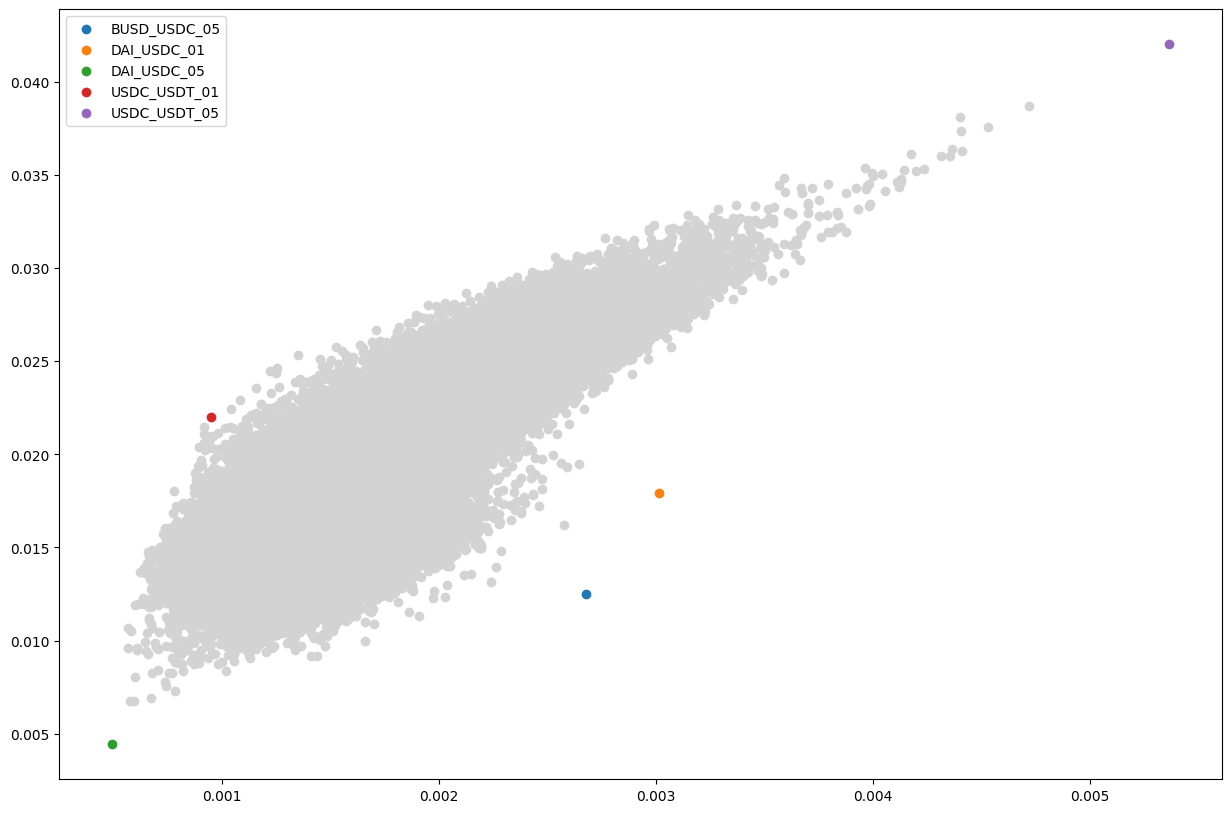

In [49]:
plt.scatter(results.annual_std,results.annual_returns,color='lightgrey')
for index, row in base_case.iterrows():
    pool_name=base_case.columns[index]
    plt.scatter([row.annual_std],[row.annual_returns],label=pool_name)
_=plt.legend()